In [64]:
from pathlib import Path
import pandas as pd
import glob
import matplotlib.pyplot as plt
import numpy as np
import csv
import matplotlib.pyplot as plt
from PIL import Image
from tensorflow import keras
import tensorflow as tf
from sklearn.model_selection import train_test_split

In [65]:
legpath=Path("./legs")
headpath=Path(".head")
legs=[]
heads=[]

legs_dict=[]
heads_dict=[]

legs_dict_desc=[]
heads_dict_desc=[]

        
def myLegsFunc():
    for leg in glob.glob("legs/*.jpg"):
        img = Image.open(str(leg))
        resized_im=img.resize((32,32)).convert('RGB')
        convert_np=np.array(resized_im)
        csv_format_img=[convert_np, '0']
        legs_dict_desc.append(0)
        legs_dict.append(np.array(convert_np))
        legs.append(csv_format_img)
        #plt.imshow(np.array(convert_np))
        #plt.show()


def myHeadsFunc():
    for head in glob.glob("head/*.jpg"):
        img = Image.open(str(head))
        resized_im=img.resize((32,32)).convert('RGB')
        convert_np=np.array(resized_im)
        csv_format_img=[convert_np, '1']
        heads_dict_desc.append(1)
        heads_dict.append(np.array(convert_np))
        heads.append(csv_format_img)
        #plt.imshow(np.array(convert_np))
        #plt.show()
    
myHeadsFunc()
myLegsFunc()


legs_head_dict=legs_dict+ heads_dict
legs_head_dict_desc=legs_dict_desc+ heads_dict_desc
appData=zip(np.array(legs_head_dict,dtype='uint8'),np.array(legs_head_dict_desc,dtype='uint8'))
appData2= tuple(((np.array(legs_head_dict,dtype='uint8')),np.array(legs_head_dict_desc,dtype='uint8')))
#appData2=((appData2),(appData2))
#len(appData)
print(type(appData2[0]))
#print(appData2)
#print(len(appData2[0]))
X_train, X_test, y_train, y_test = train_test_split(legs_head_dict, legs_head_dict_desc, test_size=0.20, random_state=101)


appData1=tuple(((np.array(X_train,dtype='uint8')),np.array(y_train,dtype='uint8')))
appData3=tuple(((np.array(X_test,dtype='uint8')),np.array(y_test,dtype='uint8')))
appData2=((appData1),(appData3))
(train_images,train_labels),(test_images, test_labels)=appData2
print(len(train_images))
class_names=["leg","head"]

<class 'numpy.ndarray'>
79


In [66]:

#print(np.array(train_images[7]))
test_labels

array([1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1],
      dtype=uint8)

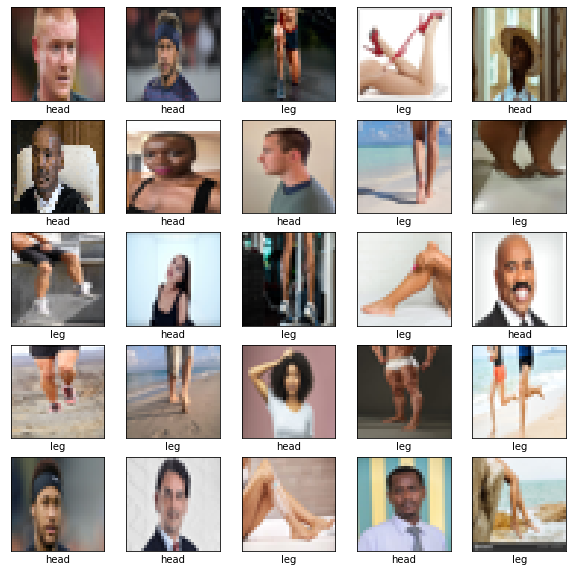

In [67]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], )
    plt.xlabel(class_names[train_labels[i]])
plt.show()


In [68]:
from tensorflow.keras import datasets, layers, models
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))

In [69]:
model.summary()

Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_24 (Conv2D)           (None, 30, 30, 32)        896       
_________________________________________________________________
max_pooling2d_16 (MaxPooling (None, 15, 15, 32)        0         
_________________________________________________________________
conv2d_25 (Conv2D)           (None, 13, 13, 64)        18496     
_________________________________________________________________
max_pooling2d_17 (MaxPooling (None, 6, 6, 64)          0         
_________________________________________________________________
conv2d_26 (Conv2D)           (None, 4, 4, 64)          36928     
Total params: 56,320
Trainable params: 56,320
Non-trainable params: 0
_________________________________________________________________


In [70]:
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(2))

In [71]:
model.summary()

Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_24 (Conv2D)           (None, 30, 30, 32)        896       
_________________________________________________________________
max_pooling2d_16 (MaxPooling (None, 15, 15, 32)        0         
_________________________________________________________________
conv2d_25 (Conv2D)           (None, 13, 13, 64)        18496     
_________________________________________________________________
max_pooling2d_17 (MaxPooling (None, 6, 6, 64)          0         
_________________________________________________________________
conv2d_26 (Conv2D)           (None, 4, 4, 64)          36928     
_________________________________________________________________
flatten_4 (Flatten)          (None, 1024)              0         
_________________________________________________________________
dense_8 (Dense)              (None, 64)               

In [72]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

history = model.fit(train_images, train_labels, epochs=10, 
                    validation_data=(test_images, test_labels))

Epoch 1/10
3/3 [==============================] - 0s 121ms/step - loss: 52.3869 - accuracy: 0.4557 - val_loss: 6.1441 - val_accuracy: 0.4500
Epoch 2/10
3/3 [==============================] - 0s 47ms/step - loss: 15.6572 - accuracy: 0.4810 - val_loss: 7.4397 - val_accuracy: 0.6500
Epoch 3/10
3/3 [==============================] - 0s 46ms/step - loss: 7.0380 - accuracy: 0.5570 - val_loss: 11.8140 - val_accuracy: 0.3500
Epoch 4/10
3/3 [==============================] - 0s 41ms/step - loss: 4.8034 - accuracy: 0.5443 - val_loss: 1.3051 - val_accuracy: 0.7000
Epoch 5/10
3/3 [==============================] - 0s 43ms/step - loss: 1.4015 - accuracy: 0.5696 - val_loss: 1.1475 - val_accuracy: 0.6500
Epoch 6/10
3/3 [==============================] - 0s 33ms/step - loss: 0.8729 - accuracy: 0.6582 - val_loss: 2.3659 - val_accuracy: 0.4500
Epoch 7/10
3/3 [==============================] - 0s 38ms/step - loss: 0.8180 - accuracy: 0.6709 - val_loss: 0.9410 - val_accuracy: 0.6000
Epoch 8/10
3/3 [=======

1/1 - 0s - loss: 1.0845 - accuracy: 0.5500


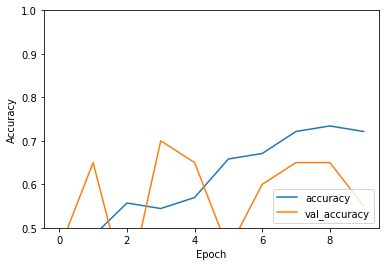

In [73]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')

test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)

In [78]:
test_loss,test_acc = model.evaluate(test_images, test_labels, verbose=2)

print("Accuracy is ", test_acc)

1/1 - 0s - loss: 1.0845 - accuracy: 0.5500
Accuracy is  0.550000011920929


In [75]:
prediction=model.predict(test_images)
print(np.argmax(prediction[3]))

1


0


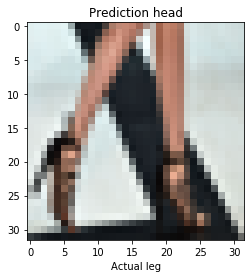

In [76]:

plt.grid(False)
plt.imshow(test_images[3])
print(test_labels[2])
plt.xlabel("Actual "+ class_names[test_labels[3]])
plt.title("Prediction "+ class_names[np.argmax(prediction[3])])
plt.show()




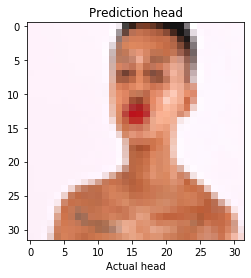

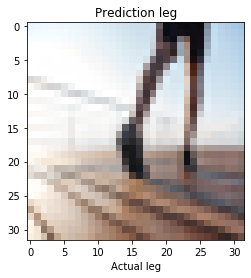

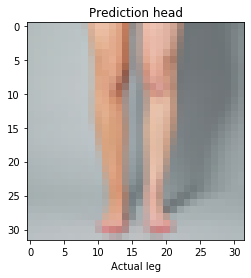

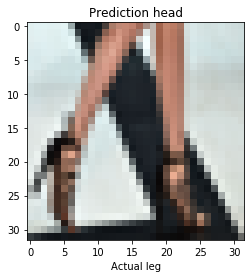

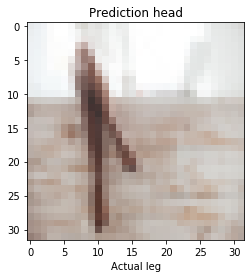

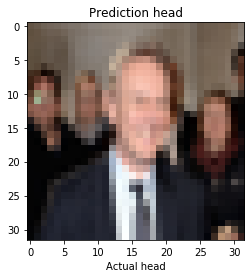

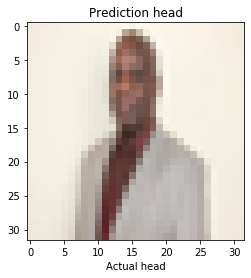

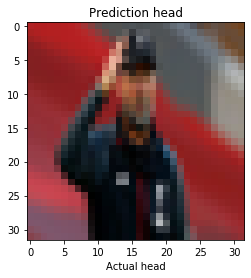

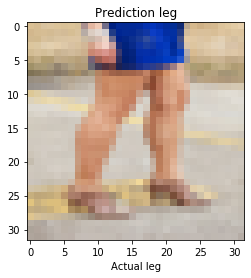

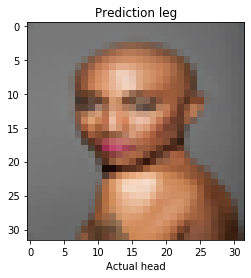

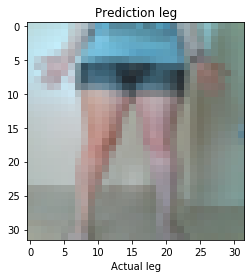

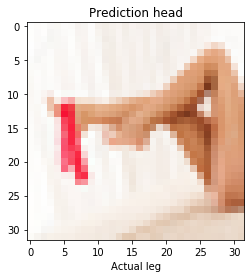

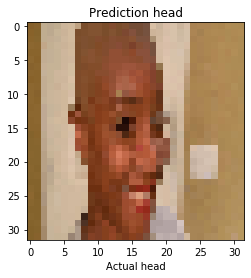

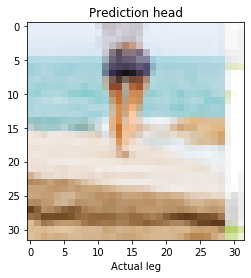

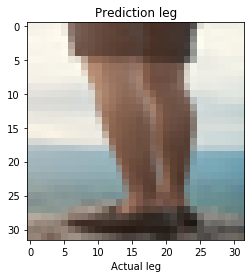

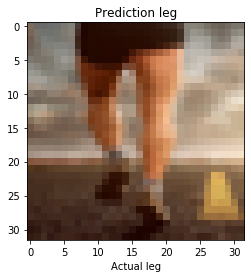

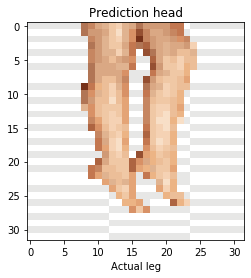

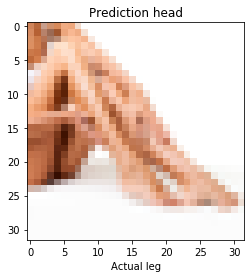

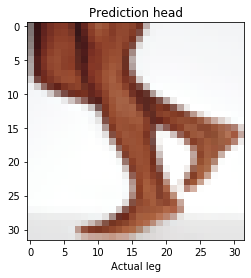

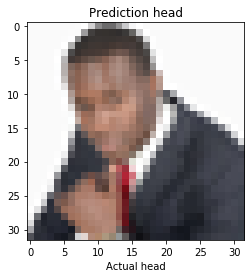

In [77]:
for i in range(len(test_images)):
    plt.grid(False)
    plt.imshow(test_images[i], cmap=plt.cm.binary)
    plt.xlabel("Actual "+ class_names[test_labels[i]])
    plt.title("Prediction "+ class_names[np.argmax(prediction[i])])
    plt.show()